# Cermati Test

By: Bintang Muhammadd

In [80]:
import pandas as pd
import datetime as dt
import calendar
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [192]:
df=pd.read_excel('Caller and Agent Data.xls')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             336 non-null    datetime64[ns]
 1   Time (Local)     336 non-null    int64         
 2   Eyeballs         336 non-null    int64         
 3   Zeroes           336 non-null    int64         
 4   Completed Calls  336 non-null    int64         
 5   Requests         336 non-null    int64         
 6   Unique Agents    336 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 18.5 KB


- Date = Date of call
- Time (Local)= The start of the hour 
- Eyeballs = People who opens the call center app
- Zeroes = how many people did not see agent at that time
- Requests = how many people request a call
- Completed_Calls = Call that succed
- Unque Agents = agents that available that time

11 people opened the call center app (Eyeballs). 
2 of them did not see any agents (Zeroes), and 
4 of them requested a call (Requests). 
Of the 4 Requests, only 3 complete calls actually resulted (Completed). 
During this time, there were a total of 6 call center agents who logged in (Unique Agents).


In [14]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Calls',
       'Requests ', 'Unique Agents'],
      dtype='object')

In [15]:
df.rename(columns = {'Time (Local)': 'time'}, inplace=True)
df.rename(columns = {'Eyeballs ': 'eyeballs'}, inplace=True)
df.rename(columns = {'Zeroes ': 'zeroes'}, inplace=True)
df.rename(columns = {'Requests ': 'requests'}, inplace=True)
df.rename(columns = {'Completed Calls': 'calls'}, inplace=True)
df.rename(columns = {'Unique Agents': 'agents'}, inplace=True)
df.rename(columns = {'Date': 'date'}, inplace=True)

In [16]:
df.columns

Index(['date', 'time', 'eyeballs', 'zeroes', 'calls', 'requests', 'agents'], dtype='object')

# Question 2

Which date had the most completed call during the two week period?

In [159]:
df_date=df.groupby(['date'])[['calls']].sum().sort_values(by='calls',ascending=False).reset_index()
max_calls=df_date['calls'].max()
df_date[df_date['calls']==max_calls]

,date,calls
0,2012-09-22,248


answer: D (2012-09-22)

# Question 3 

What was the highest number of completed calls within a 24 hour period?


In [163]:
df_date=df.groupby(['date'])[['calls']].sum().sort_values(by='calls',ascending=False).reset_index()
df_date['calls'].max()

248

answer = 248, closest is B

# Question 4
Which hour of the day had the most call requests during the two week period?

In [172]:
df_time= df.groupby(['time'])[['requests']].sum().sort_values(by='requests',ascending= False).reset_index()
df_time_max=df_time['requests'].max()
df_time[df_time['requests']==df_time_max]

,time,requests
0,23,184


answer = D (11 pm = 12 Am)

# Question 5

What percentage of all zeroes during the two week period occurred on weekends (Friday at 5pm to Sunday at 3am)?

In [21]:
df_new=df.copy()

In [22]:
df_new['day'] = pd.DatetimeIndex(df_new['date']).day_name()
df_new2=df_new

In [194]:
df_weekend=df_new2[df_new2['day'].str.contains('Friday|Saturday|Sunday')]

#finding calls on Friday after 5PM
df_friday_after5=df_weekend[(df_weekend['day'].str.contains('Friday'))&((df_weekend['time']>=17))]

#finding calls on Saturday
df_saturday=df_weekend[(df_weekend['day'].str.contains('Saturday'))]

#finding calls on Sunday after 
df_sunday_before3=df_weekend[(df_weekend['day'].str.contains('Sunday'))&((df_weekend['time']<=2))]


In [195]:
df_fri_satur=df_friday_after5.append(df_saturday)
df_fss=df_fri_satur.append(df_sunday_before3)

In [199]:
print(round(df_fss['zeroes'].sum()/df_new2['zeroes'].sum()*100,1))

44.9


answer = C (44,9%)

# Question 6

 In drafting an agent schedule in terms of 8 hour shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests?

- 7pm-3am = 19-2
- 5pm-1am = 17-0
- 2pm-10pm = 14-21
- 4pm-12am = 16-23

In [174]:
df_shift=df_new2.groupby(['time'])[['requests']].sum().reset_index().sort_values(by='requests',ascending=False)

In [175]:
#Jam 19 - 3

df_19_1=df_shift[(df_shift['time']>=19)|((df_shift['time']<=2))]
print('Maka Jumlah Request pada Shift 19PM - 3AM adalah', df_19_1['requests'].sum(), 'request')
shift191=df_19_1['requests'].sum()

Maka Jumlah Request pada Shift 19PM - 3AM adalah 1071 request


In [176]:
#Jam 17 - 1

df_17_0=df_shift[(df_shift['time']>=17)|((df_shift['time']<=0))]
print('Maka Jumlah Request pada Shift 19PM - 3AM adalah', df_17_0['requests'].sum(), 'request')
shift170=df_17_0['requests'].sum()

Maka Jumlah Request pada Shift 19PM - 3AM adalah 1092 request


In [177]:
#Jam 14 - 22

df_14_21=df_shift[(df_shift['time']>=14)&((df_shift['time']<=21))]
print('Maka Jumlah Request pada Shift 19PM - 3AM adalah', df_14_21['requests'].sum(), 'request')
shift1421=df_14_21['requests'].sum()

Maka Jumlah Request pada Shift 19PM - 3AM adalah 816 request


In [178]:
#Jam 16-23
df_16_23=df_shift[(df_shift['time']>=16)&((df_shift['time']<23))]
print('Maka Jumlah Request pada Shift 19PM - 3AM adalah', df_16_23['requests'].sum(), 'request')
shift1623=df_16_23['requests'].sum()

Maka Jumlah Request pada Shift 19PM - 3AM adalah 848 request


In [180]:
df_shift_combined={'shift':['7PM-3AM','5PM-1AM','2PM-10PM','4PM-12AM'],
                  'requests':[shift191,shift170,shift1421,shift1623]}
df_shift_all=pd.DataFrame.from_dict(df_shift_combined).sort_values(by=['requests'],ascending=False).reset_index(drop=True)
max_req=df_shift_all['requests'].max()
df_shift_all[df_shift_all['requests']==max_req]

,shift,requests
0,5PM-1AM,1092


answer= B (5pm to 1 am)

# Question 7

Agent supply always increases when demand increases during the two week period, true or false?.

In [34]:
df_agent=df.groupby(['date'])[['agents']].sum().reset_index()
df_agent['date_only']=df_agent['date'].dt.strftime("%m-%d")

In [36]:
df_agent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       15 non-null     datetime64[ns]
 1   agents     15 non-null     int64         
 2   date_only  15 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 488.0+ bytes


Text(0.5, 0, 'Month and Date in 2012')

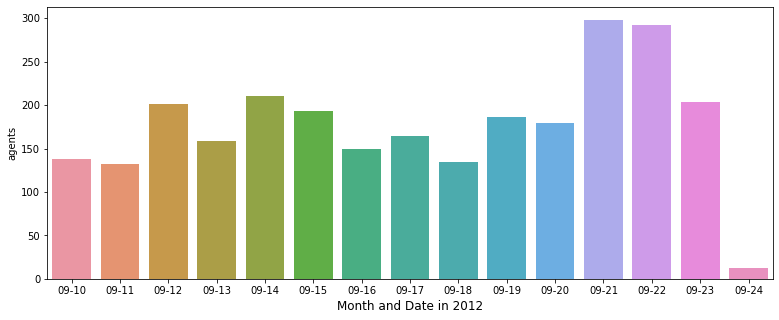

In [200]:
plt.figure(figsize=(13, 5))
sns.barplot(x = 'date_only', y = 'agents' , data = df_agent)

plt.xlabel('Month and Date in 2012', fontsize=12)

answer= False

# Question 8

In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?
- A) 4am 9/19 - 4am 9/22
- B) 11am 9/20 - 11am 9/23
- C) 5pm 9/14 - 5pm 9/17
- D) 4am 9/16 - 4am 9/19


In [39]:
df_ze=df_new2.groupby(['date','time']).sum().reset_index()

In [40]:
#4am 9/19 - 4am 9/22

df_1922=df_ze[(df_ze['date']=='2012-09-19')&(df_ze['time']>=4)].append(
        df_ze[(df_ze['date']=='2012-09-20')|(df_ze['date']=='2012-09-21')]).append(
        df_ze[(df_ze['date']=='2012-09-22')&(df_ze['time']<=3)]).reset_index(drop=True)

eye1922=df_1922['eyeballs'].sum()
zero1922=df_1922['zeroes'].sum()

In [41]:
# 11am 9/20 - 11am 9/23

df_2023=df_ze[(df_ze['date']=='2012-09-20')&(df_ze['time']>=11)].append(
        df_ze[(df_ze['date']=='2012-09-21')|(df_ze['date']=='2012-09-22')]).append(
        df_ze[(df_ze['date']=='2012-09-23')&(df_ze['time']<=10)]).reset_index(drop=True)

eye2023=df_2023['eyeballs'].sum()
zero2023=df_2023['zeroes'].sum()

In [42]:
# 5pm 9/14 - 5pm 9/17

df_1417=df_ze[(df_ze['date']=='2012-09-14')&(df_ze['time']>=17)].append(
        df_ze[(df_ze['date']=='2012-09-15')|(df_ze['date']=='2012-09-16')]).append(
        df_ze[(df_ze['date']=='2012-09-17')&(df_ze['time']<=16)]).reset_index(drop=True)

eye1417=df_1417['eyeballs'].sum()
zero1417=df_1417['zeroes'].sum()

In [43]:
# 4am 9/16 - 4am 9/19

df_1619=df_ze[(df_ze['date']=='2012-09-16')&(df_ze['time']>=4)].append(
        df_ze[(df_ze['date']=='2012-09-17')|(df_ze['date']=='2012-09-18')]).append(
        df_ze[(df_ze['date']=='2012-09-19')&(df_ze['time']<=15)]).reset_index(drop=True)

eye1619=df_1619['eyeballs'].sum()
zero1619=df_1619['zeroes'].sum()

In [185]:
df_all={'date_and_time':['4AM 9/19 - 4AM 9/22','11AM 9/20 - 11AM 9/23','5PM 9/14 - 5PM 9/17','4PM 9/16 - 4PM 9/19'],
   'eyeball_Total':[eye1922,eye2023,eye1417,eye1619],
   'zeroes_Total':[zero1922,zero2023,zero1417,zero1619],
   'zeroes_%':[zero1922/eye1922*100,zero2023/eye2023*100,zero1417/eye1417*100,zero1619/eye1619*100]}

df_all72=pd.DataFrame.from_dict(df_all).sort_values(by='zeroes_%',ascending=False).reset_index(drop=True)

max_percent= df_all72['zeroes_%'].max()
df_all72[df_all72['zeroes_%']==max_percent]

,date_and_time,eyeball_Total,zeroes_Total,zeroes_%
0,5PM 9/14 - 5PM 9/17,1742,441,25.315729


answer = C (5PM 9/14 - 5PM 9/17)

# Question 9

If you could add 5 agents to any single hour every day during the two week period, which hour should you add them to?
 
Hint: Consider both potential caller eyeballs and agent supply when choosing
- A) 5pm - 6pm
- B) 9pm - 10pm
- C) 11pm - 12am
- D) 5am - 6am




In [190]:
df_time_all=df.groupby(['time'])[['eyeballs','agents']].sum().sort_values(by='eyeballs', ascending=True).reset_index()
df_time_all2=df_time_all[(df_time_all['time']==5)|(df_time_all['time']==9)|(df_time_all['time']==11)|(df_time_all['time']==17)].reset_index(drop=True)

eyeballs_min=df_time_all2['eyeballs'].min()
agents_min=df_time_all2['agents'].min()

df_time_all2[(df_time_all2['eyeballs']==eyeballs_min)&(df_time_all2['agents']==agents_min)]

,time,eyeballs,agents
0,5,42,11


answer = D (5AM to 6 AM)

# Question 10

Looking at the data from all two weeks, which time might make the most sense to consider a true "end of day" instead of midnight? 
(i.e., when are supply and demand both at natural minimums)


Tip: Visualize the data to confirm your answer if needed
- A) 11pm
- B) 2am
- C) 4am
- D) 7am


In [202]:
df_time_all
df_tertentu=df_time_all[(df_time_all['time']==10)|(df_time_all['time']==1)|(df_time_all['time']==3)|(df_time_all['time']==6)].reset_index(drop=True)

In [203]:
df_tertentu['time']=df_tertentu['time'].astype(str)
df_tertentu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      4 non-null      object
 1   eyeballs  4 non-null      int64 
 2   agents    4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


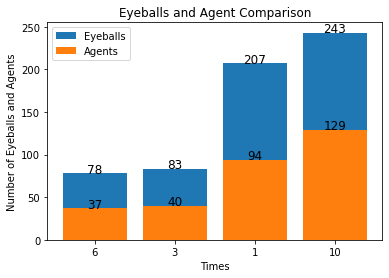

In [204]:
#creating plot

width = 0.8  

x=df_tertentu['time']
y=df_tertentu['eyeballs']
y2=df_tertentu['agents']
plt.bar(x='time', width=width,height='eyeballs',label = 'Eyeballs',data=df_tertentu)
plt.bar(x='time',width=width,height='agents', label = 'Agents',data=df_tertentu)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i], y = y[i]+0.5, s = str(y[i]), size = 12, ha='center')
    
for i in x_numbers:
    plt.text(x = x_numbers[i], y = y2[i]+0.5, s = str(y2[i]), size = 12, ha='center')
    

plt.xlabel("Times")
plt.ylabel("Number of Eyeballs and Agents")
plt.title("Eyeballs and Agent Comparison")
plt.legend()
plt.show()

answer= C (4 AM)